In [ ]:
#install libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Reshape,LeakyReLU
from tensorflow.keras.models import Sequential #sequential for sequential structure
import matplotlib.pyplot as plt
import os

In [ ]:
#numpy is use cause we use images and convert to vectors and then send to model
#numpy is for mathemathical operations in python
#tensorflow introduced by google we have keras layers used for processing
#reshape is for specific vectors conversion like 1D vector to 2D vector
#sequential model is used to calculate layer by layer outputs and pass to next layer
#change to T4GPU

In [ ]:
#load and normalize the MNIST Data

In [ ]:
#normalize means the data values lies in between -1 and 1

In [ ]:
#minst data means eg you write 0 to 9 numbers in paper and every one in
#class of 70 wrote like that everyone handwritting is different style
#this is MINST data

In [ ]:
#MINST data use is it has different hand writing
#MINST= modified national institute of standards and technology
#when we are loading data from keras we get complete dataset
#eg 10 people wrote digits we make all 0s as class zero and all 1s as class one
#this is done for all
#for GANs no need of these class names because we are training our model
#and based on training it needs to generate new image
#so before training my generator Im not gonna specify which one is zero
#which is one or which is any number
#we just train the model so xtrain contains features of data and ytrain
#get labelled class data class 0 to class 9
#so we skip the ytrain and xtest and ytest so we use underscore

In [ ]:
#image pixels 0 to 255
#if we multiply one pixel with other we get a big number
#like this we get so many number after computation
#we need more computation power and memory more CPU and More GPU
#so instead of this we just scale the values to -1 to 1 range by normalize


In [ ]:
#astype change type    float32 will help to calculate and maintain some values
#float32 we can overcome the issues and the computations helps us to do
#the calculations using float32 and check some errors
#127.5 after getting values from range 0 to 255 and subtract 127.5 we get
#some value and by dividing with 127.5 we get the values btw -1 and 1 or
#0 and 1
#buffersize is the number of images in dataset we have nearly 60k in dataset
##so we arrange for every batchsize we send each batchwise data
#we are shuffling the buffersize data cause we wont get any issues
#if send normally without shuffle in queue format then model wont understand
#anything it wont get the pattern it will just copy features and
#paste them in the same given way so we get errors from model
#so we shuffle images so it will gain some knowledge
#this is why we declared batchsize and buffersize

In [ ]:
#loading dataset from keras builtin dataset
(X_train,_),(_,_)=tf.keras.datasets.mnist.load_data()
X_train=(X_train.astype(np.float32)-127.5)/127.5
X_train=np.expand_dims(X_train,axis=-1)

Buffer_size=60000
Batch_size=128

dataset=tf.data.Dataset.from_tensor_slices(X_train).shuffle(Buffer_size).batch(Batch_size)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#to overcome computational usage of cpu and gpu we normalize the data

In [ ]:
#build generator and discriminator
#sequential we use CNN layers dense layer takes neurons 256 neurons
#input shape is 100 if you are training the generator it accepts noise data in
#1D vector in single vector we have 100 data points itss like normal or gaussian distribution
#so we use these 100 values and using these 100 values we connect the 256 neurons
#we connect all 256 neurons with 100 datapoints in hidden layer
#after dense we use leakyrelu to convert all information to standard
#if value less than 0 then makes as 0.2 and greater than 0 dont change
#if we make the values if less than zero to zero then some neurons are disabled
#deactivated cant pass values to next layer multiplication not possible
#so we make as 0.2 by leaky relu
#next again Dense increase neurons to 512
#next to 1024 then we have 28*28 height * width or you can mention as 784
#because generator need to generate image same as real image size

In [ ]:
#flatten layer specify image size input cause discriminator need to learn
#1 specify image color if 3 RGB 1 black white etc etc
#no of channels 3rd parameter 1 means grayscale
#here it needs to understand patterns so the nerurons are reduced
#final we have 1 neuron and sigmoid activation to classify for real or fake

In [ ]:
def generator():
    model=Sequential([
        Dense(256,input_shape=(100,)),
        LeakyReLU(0.2),
        Dense(512),
        LeakyReLU(0.2),
        Dense(1024),
        LeakyReLU(0.2),
        Dense(28*28,activation='tanh'),
        Reshape((28,28,1))
    ])
    return model
#Discriminator
def discriminator():
    model=Sequential([
        Flatten(input_shape=(28,28,1)),
        Dense(512),
        LeakyReLU(0.2),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1,activation='sigmoid')
    ])
    return model
gen_model = generator()
disc_model = discriminator()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Now we created a model next we need loss function and optimizers
#when we calculate the difference real or fake image discriminator
#based on that it gives output which real or fake for that we use loss
#generally we have a real one when generator generate a fake one
#real img has some features and loss is have some features so based
#on some features its going to have some loss its going to give some differences
#difference is loss so we binarycrossentropy to calculate loss function
#for any of two if you want to get loss btw 2 things we use binarycrossentropy

In [ ]:
#first we will check the generator loss
#generator optimizer for eg real fake images are there we know difference
#based on loss we train the model again and update the weights and values
#this contimues this is done by Adam optimizer to make model accurate
#le means learning rate we specify how much form it learns like how much stress it should take
#if it learn more complexities we face issues so we specify learning rate
#like there are 10 imgs understand and learn from these 10 and go for next 10
#if you specify learning rate high like 10 20 30 so on 100 then some features of imgs may be captured and may not be captured
#if you specify learning rate low that slow the model learns and tries to learn all features

In [ ]:
cross_entropy=tf.keras.losses.BinaryCrossentropy()
generator_optimizer=tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-4)


In [ ]:
#optimizer used for optimizing
#next we need to train model so training Steps
#we use a decorater @ one to think whether it works or not
#decorator means a function that take care of everything we have some flows
#means packages after one after one need to use so we use decorator


In [ ]:
#images parameter as input next we give noise data randomly
#Normal means normal distribution and batch size is 100
#we use 128 images and each image has 100 vectors batch size
#next we train discriminator we need to pass input images
#gradient is provided by tensorflow to check whether all layer are calculating
#accurately or not they gave this option as tf.gradient
#they gave as discrete tape

In [ ]:
#for generator imgs we pass noisy data and discriminator we give input imgs
#True me we are training model so we pass noisy data rondomly
#random function with normal distribution is used so for the vector
#these values are as vectors so every batch size 12800 vectors of noise one
#vector is taken randomly and assigned to noise variable and pass to model
#we pass real imgs to discriminator and we say that its trained and gives output real or fake
#based on probability like for real imgs 0.9 or 0.8 something
#we pass fake img to discriminator so it can understand how to predict
#fake imgs these fakes have less probabilities

In [ ]:
#cross entropy means binarycrossentropy it distinguhes real fake imgs
#it will understand the differences btw real and fake imgs
#we are providing to the loss function specifying the loss function
#discriminator trainable variables are data trained the discriminator
#discriminator trainable variables passed to gradient
#we apply gradient and optimizer on real function
#1st we train discriminator

In [ ]:
#gen_tape generator train with noise and dirciminator checks the fake or not
#generator loss need to calculate
#just like how we told our model this is real image we need to tell fake img too
#next we check gradient dscent and update the weights in the background to regenerate imgs any no of times
#cross entropy is used to find the loss in real img and fake img
#and gives the loss to gradient dscent optimizer and calculates and updates weights in generator discriminator

In [ ]:
@tf.function
def train_step(images):
    noise=tf.random.normal([Batch_size,100])
    with tf.GradientTape() as disc_tape:
        generated_images=gen_model(noise,training=True)
        real_output=disc_model(images,training=True)
        fake_output=disc_model(generated_images,training=True)
        real_output=cross_entropy(tf.ones_like(real_output),real_output)
        fake_output=cross_entropy(tf.zeros_like(fake_output),fake_output)
        disc_loss=real_output+fake_output
    disc_grad=disc_tape.gradient(disc_loss,disc_model.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(disc_grad,disc_model.trainable_variables))

   #train generator
    with tf.GradientTape() as gen_tape:
        generated_images=gen_model(noise,training=True)
        fake_output=disc_model(generated_images,training=True)
        gen_loss=cross_entropy(tf.ones_like(fake_output),fake_output)
    gen_grad=gen_tape.gradient(gen_loss,gen_model.trainable_variables)
    generator_optimizer.apply_gradients(zip(gen_grad,gen_model.trainable_variables))
    return gen_loss,disc_loss

In [ ]:
#generated imgs saving
#track my losses in every time so lists
gen_losses=[]
disc_losses=[]
#directory for saving imgs
os.makedirs('generated_images',exist_ok=True)
#5,5 pixels
def generate_and_save_images(model,epoch,test_input):
    predictions=model(test_input,training=False)
    fig=plt.figure(figsize=(5,5))
    for i in range(predictions.shape[0]):
        plt.subplot(5,5,i+1)
        plt.imshow(predictions[i,:,:,0]*127.5+127.5,cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Epoch {epoch}")
    plt.savefig(f'generated_images/image_epoch_{epoch:03d}')
    plt.show()
    plt.close()

In [ ]:
#no need to give png  plt.savefig('generated_images/image_at_epoch_{:04d}.png'.format(epoch))plt.show()

In [ ]:
#execute thee Training Loop
def train(dataset,epochs=50):
    seed=tf.random.normal([25,100])
    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss,disc_loss=train_step(image_batch)
        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)
        print(f'Epoch {epoch+1},Gen_loss:{gen_loss:.4f},Disc_loss:{disc_loss:.4f}')
        generate_and_save_images(gen_model,epoch+1,seed)

In [ ]:
#seed is just random of 25 imgs and each img 100 numbers each of normal distribution
#seed is going to specify to the generator while learn it will train on this
#and it learn based on seed
#epoch no of times loop

Epoch 1,Gen_loss:3.1823,Disc_loss:0.3094


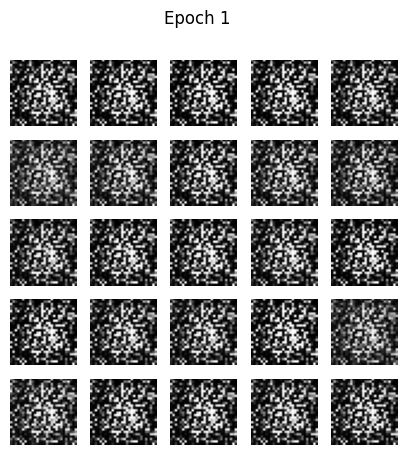

Epoch 2,Gen_loss:3.2857,Disc_loss:0.6949


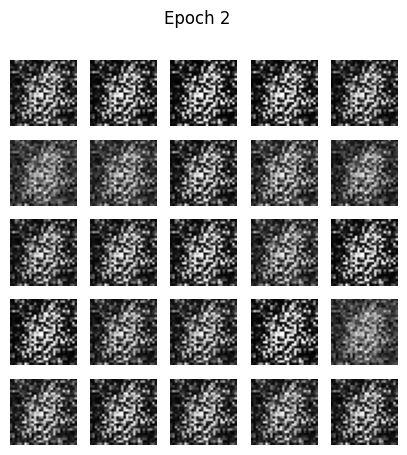

Epoch 3,Gen_loss:2.7522,Disc_loss:0.6684


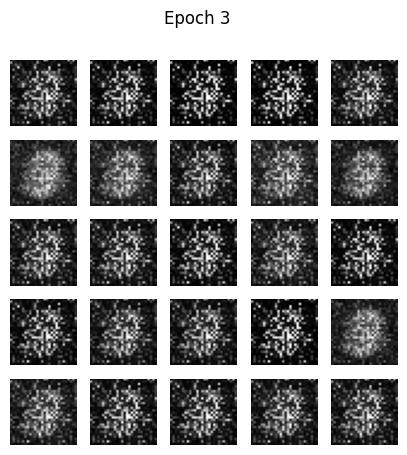

Epoch 4,Gen_loss:2.0347,Disc_loss:0.8340


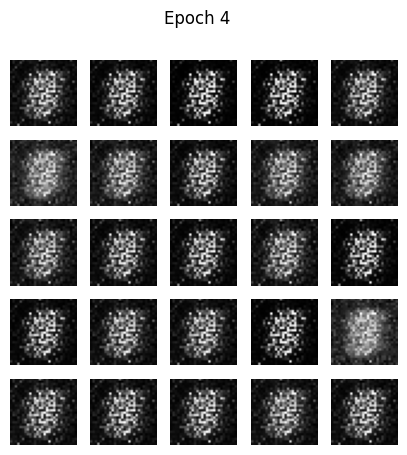

Epoch 5,Gen_loss:2.2656,Disc_loss:0.4889


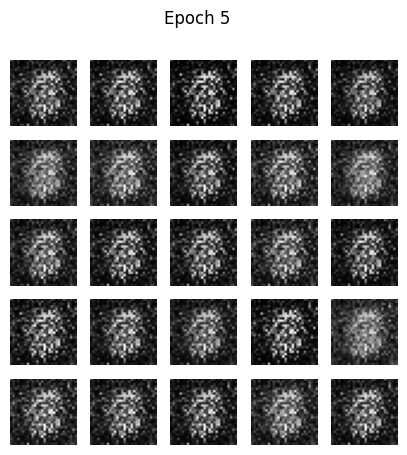

Epoch 6,Gen_loss:1.9741,Disc_loss:0.9767


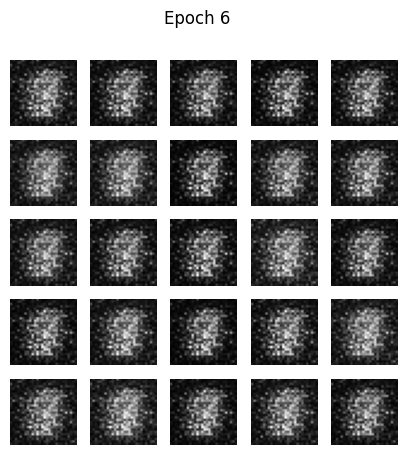

Epoch 7,Gen_loss:1.9995,Disc_loss:0.8570


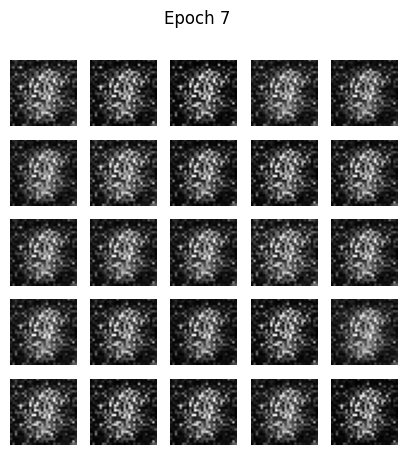

Epoch 8,Gen_loss:2.6279,Disc_loss:0.6177


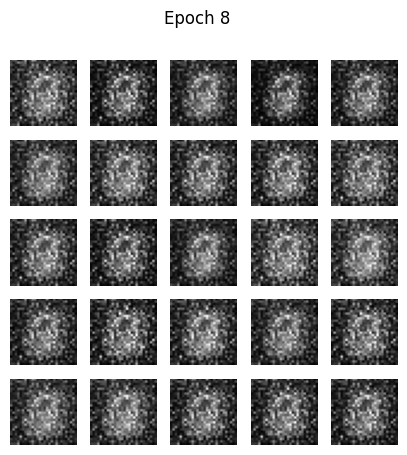

Epoch 9,Gen_loss:2.1218,Disc_loss:0.8252


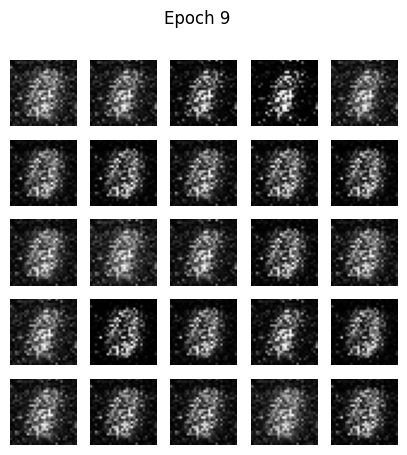

Epoch 10,Gen_loss:3.2958,Disc_loss:0.4427


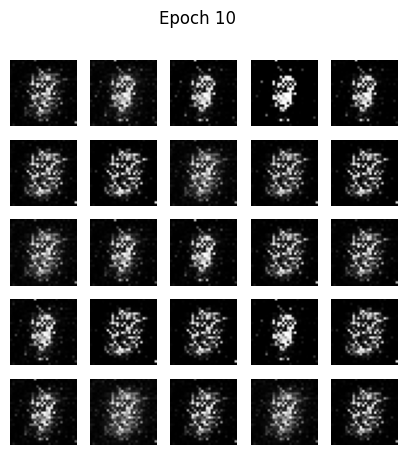

Epoch 11,Gen_loss:2.9754,Disc_loss:0.5129


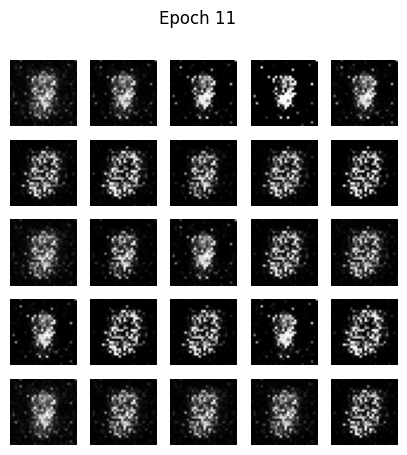

Epoch 12,Gen_loss:3.3060,Disc_loss:0.5686


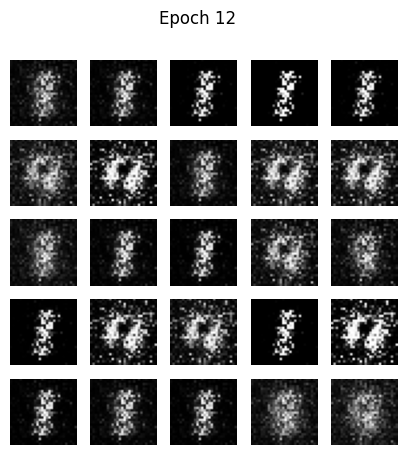

Epoch 13,Gen_loss:2.9473,Disc_loss:0.5998


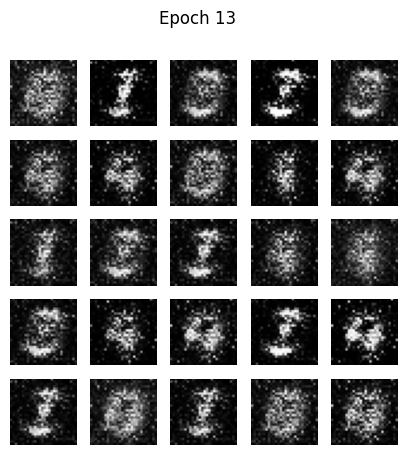

Epoch 14,Gen_loss:2.5057,Disc_loss:0.3858


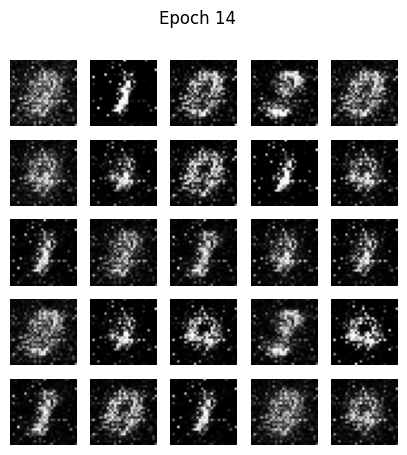

Epoch 15,Gen_loss:3.7720,Disc_loss:0.3869


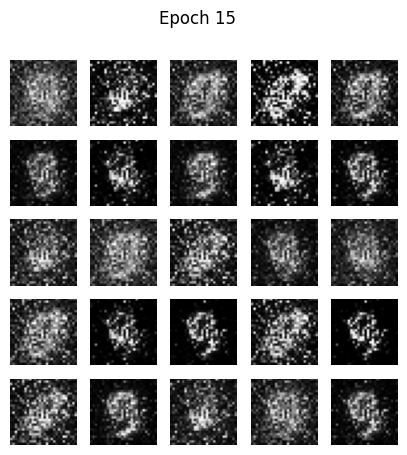

Epoch 16,Gen_loss:3.1271,Disc_loss:0.6086


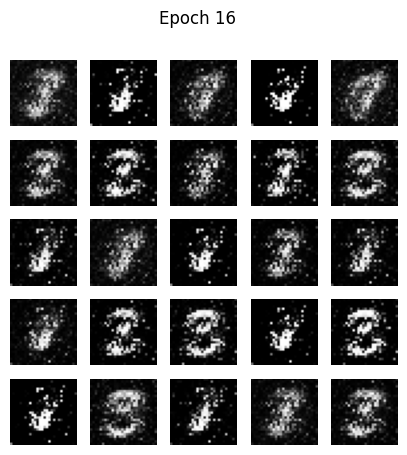

Epoch 17,Gen_loss:3.0083,Disc_loss:0.4047


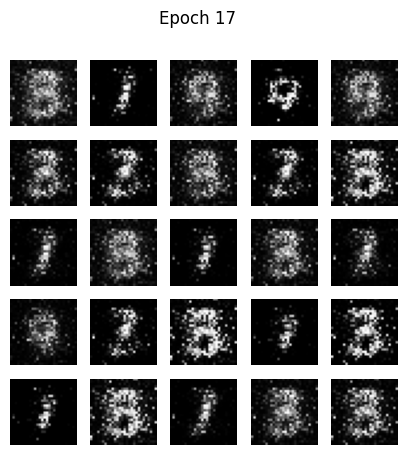

Epoch 18,Gen_loss:3.8471,Disc_loss:0.3771


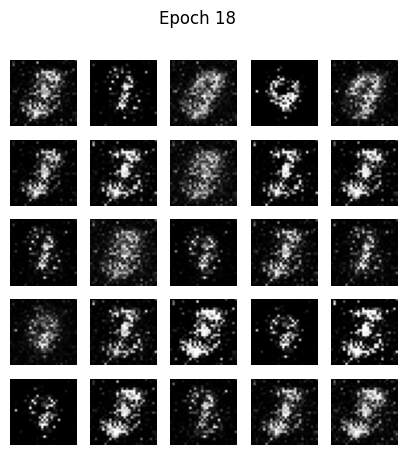

Epoch 19,Gen_loss:4.2431,Disc_loss:0.4042


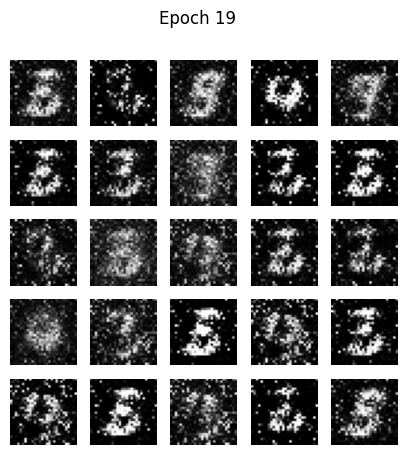

Epoch 20,Gen_loss:2.5733,Disc_loss:0.6089


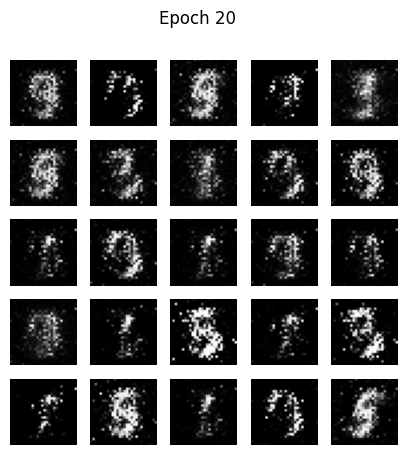

Epoch 21,Gen_loss:3.2152,Disc_loss:0.4587


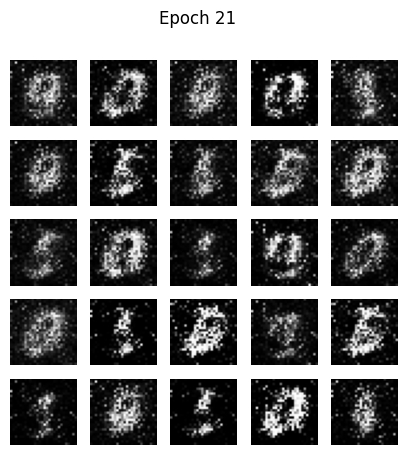

Epoch 22,Gen_loss:3.2621,Disc_loss:0.6349


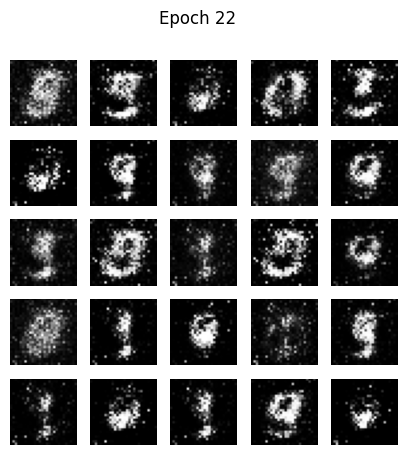

Epoch 23,Gen_loss:2.8738,Disc_loss:0.7139


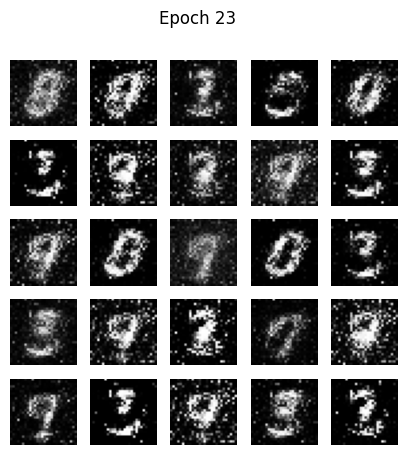

Epoch 24,Gen_loss:2.9781,Disc_loss:0.7400


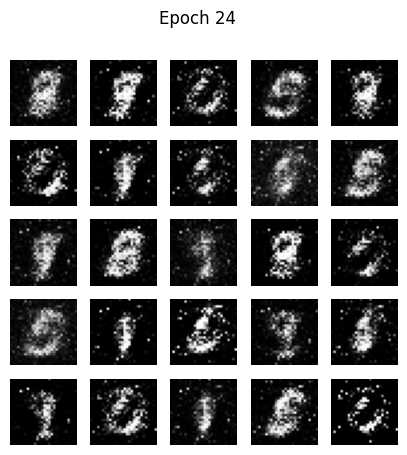

Epoch 25,Gen_loss:2.6750,Disc_loss:0.4236


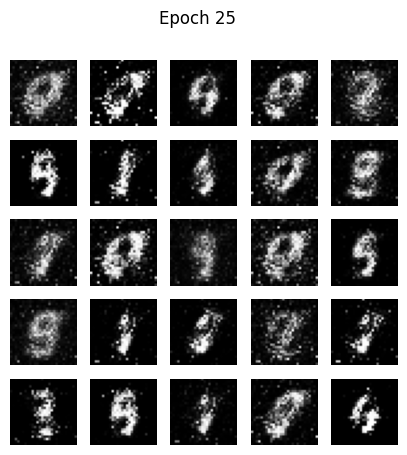

Epoch 26,Gen_loss:3.7136,Disc_loss:0.5589


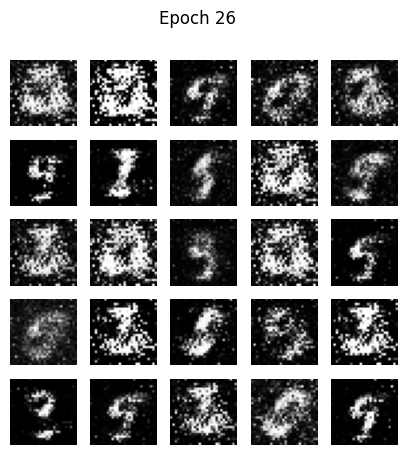

Epoch 27,Gen_loss:2.3327,Disc_loss:0.6905


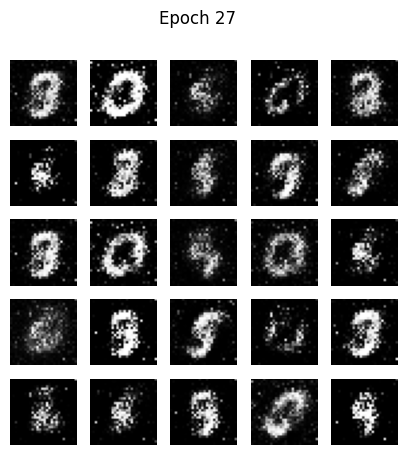

Epoch 28,Gen_loss:3.2405,Disc_loss:0.3086


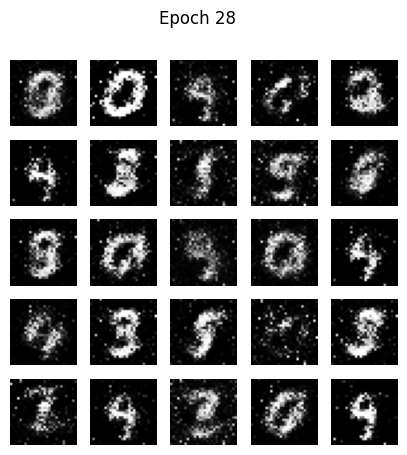

Epoch 29,Gen_loss:3.0280,Disc_loss:0.4110


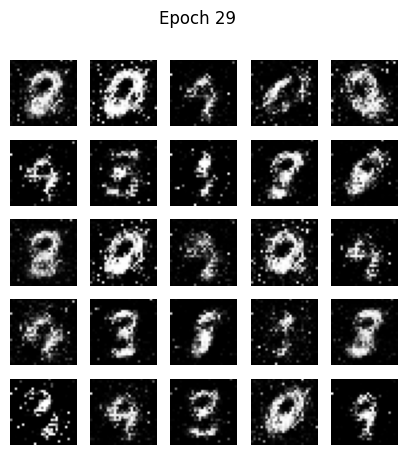

Epoch 30,Gen_loss:3.3727,Disc_loss:0.4069


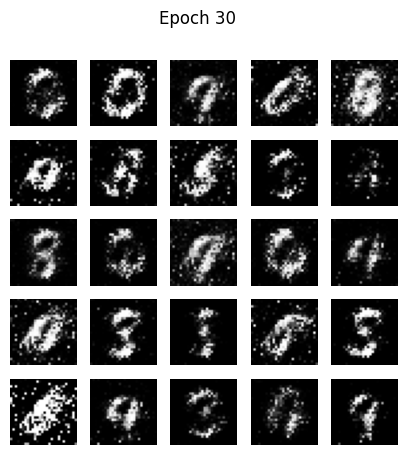

Epoch 31,Gen_loss:2.7290,Disc_loss:0.5399


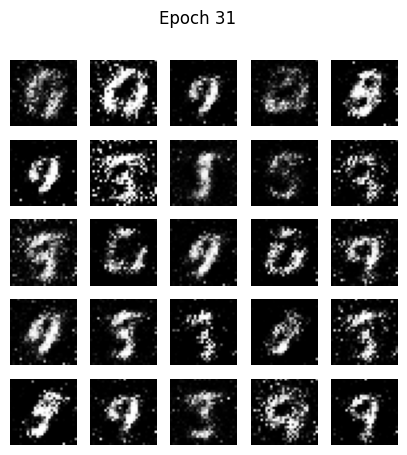

Epoch 32,Gen_loss:2.3489,Disc_loss:0.5399


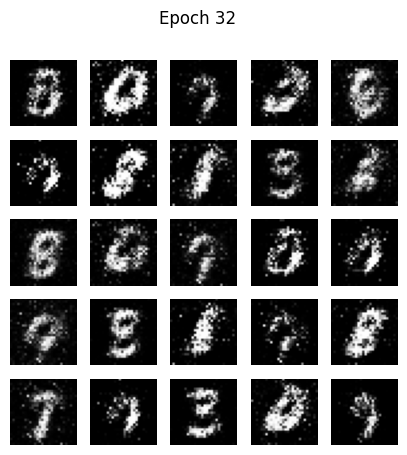

Epoch 33,Gen_loss:2.4429,Disc_loss:0.8691


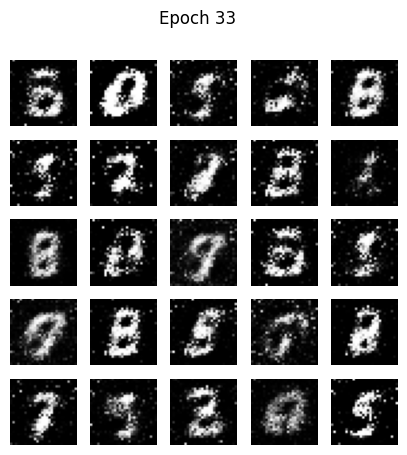

Epoch 34,Gen_loss:3.2028,Disc_loss:0.4151


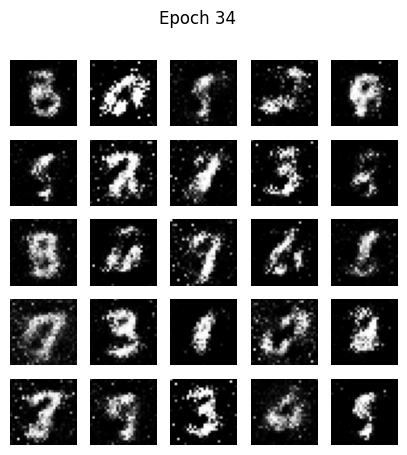

Epoch 35,Gen_loss:2.6969,Disc_loss:0.5044


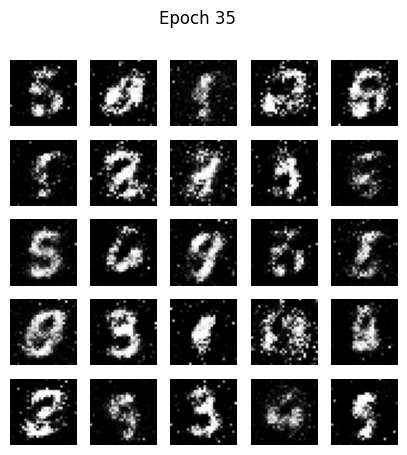

Epoch 36,Gen_loss:3.0607,Disc_loss:0.4571


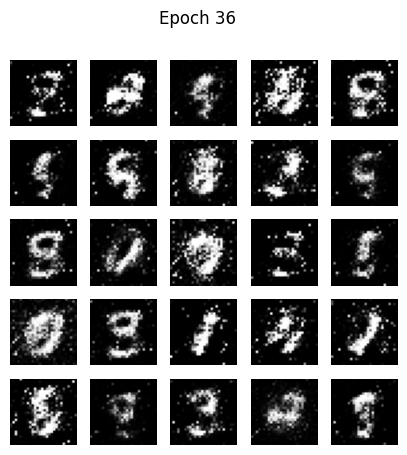

Epoch 37,Gen_loss:3.3582,Disc_loss:0.4086


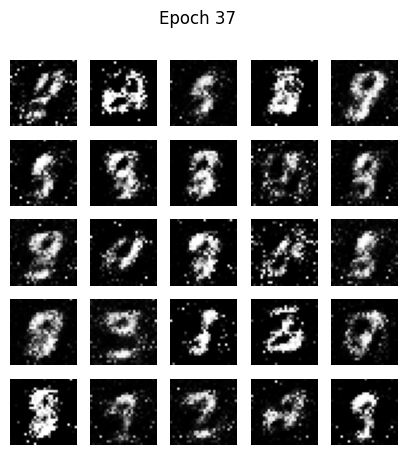

Epoch 38,Gen_loss:2.8814,Disc_loss:0.6324


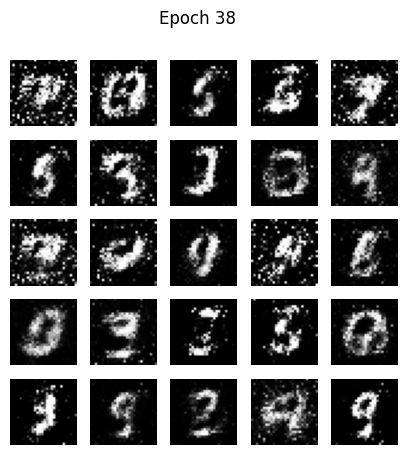

Epoch 39,Gen_loss:2.7126,Disc_loss:0.6734


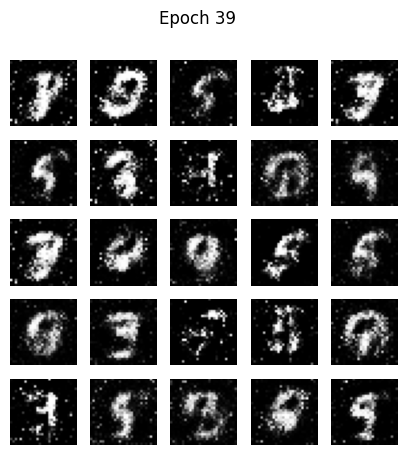

Epoch 40,Gen_loss:2.3922,Disc_loss:0.6025


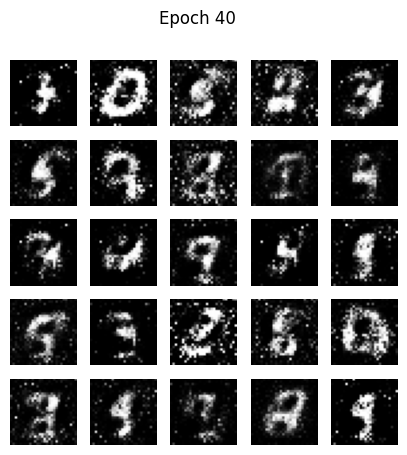

Epoch 41,Gen_loss:3.5006,Disc_loss:0.4073


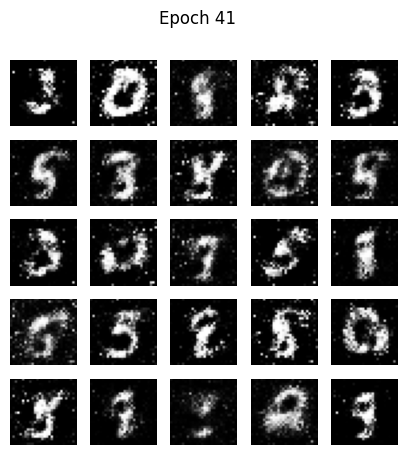

Epoch 42,Gen_loss:2.7772,Disc_loss:0.5284


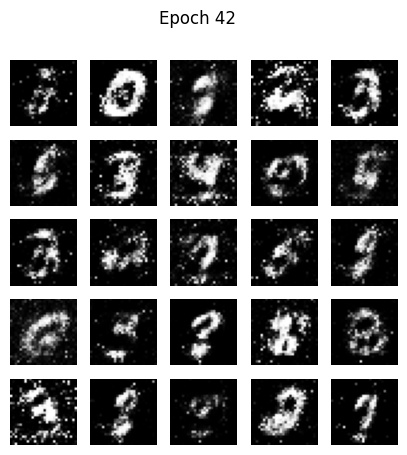

Epoch 43,Gen_loss:2.0865,Disc_loss:0.7003


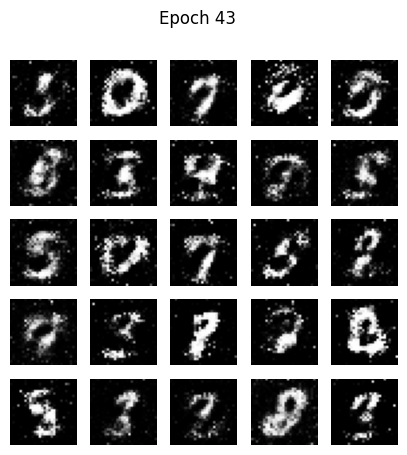

Epoch 44,Gen_loss:2.6194,Disc_loss:0.7525


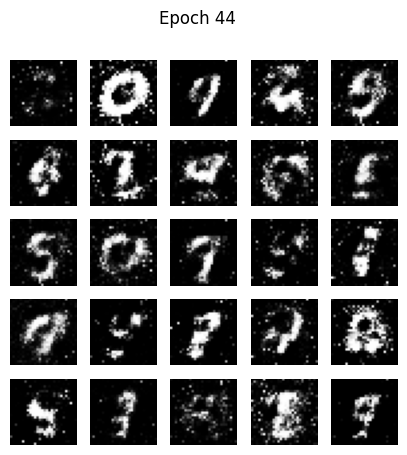

Epoch 45,Gen_loss:2.3424,Disc_loss:0.6359


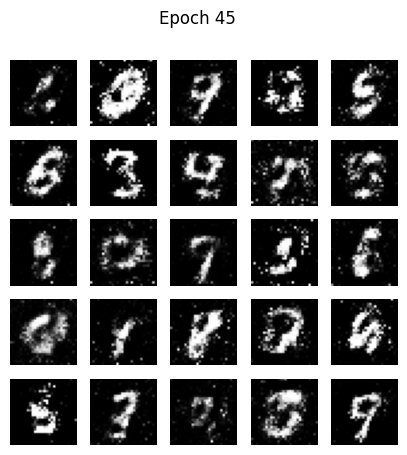

Epoch 46,Gen_loss:2.3779,Disc_loss:0.6355


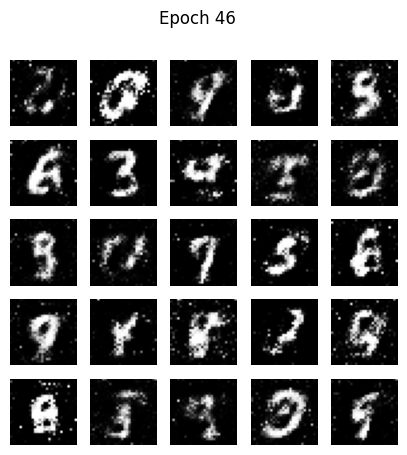

Epoch 47,Gen_loss:2.3859,Disc_loss:0.5350


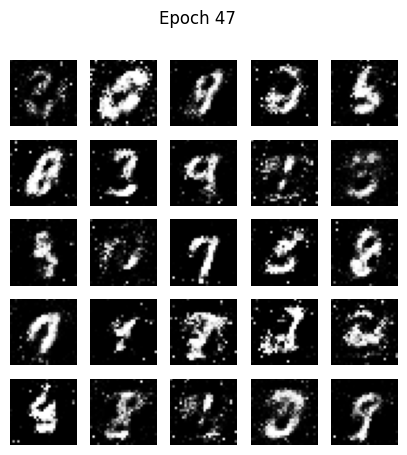

Epoch 48,Gen_loss:2.7002,Disc_loss:0.6128


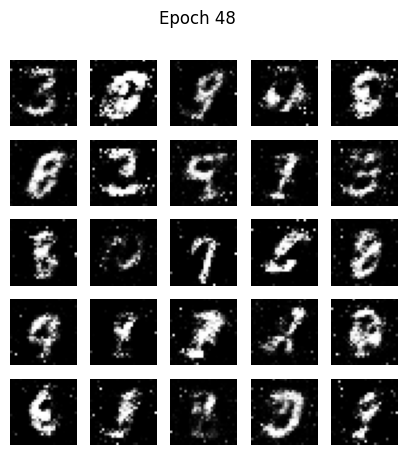

Epoch 49,Gen_loss:2.3296,Disc_loss:0.5958


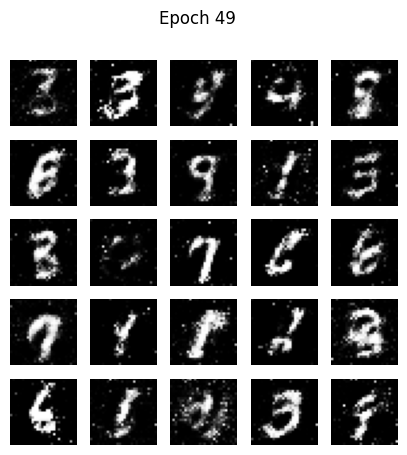

Epoch 50,Gen_loss:1.6054,Disc_loss:0.9153


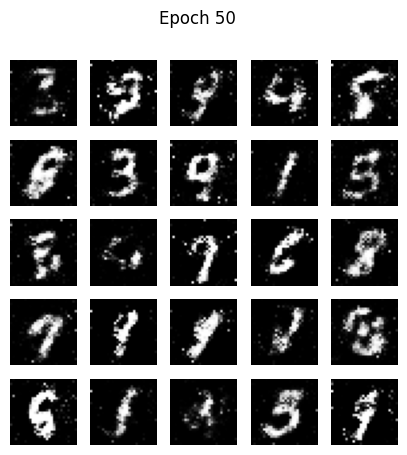

In [ ]:
train(dataset,epochs=50)

In [ ]:
#the loss is going to be updated everytime each img is noisy data
#5 imgs in row and cloumn after moving from one epoch another we extract some features

In [ ]:
#each epoch it wiil deal with set of batch of imgs train on discriminator and generator
#now generator take noisy data and starts generating imgs

In [ ]:
#after each epoch we get a more clearer img than previous epoch
#you can see a folder of created generated imgs
#lets check the final output now for that we ask model to evaluate the discriminator
#for real or fake img

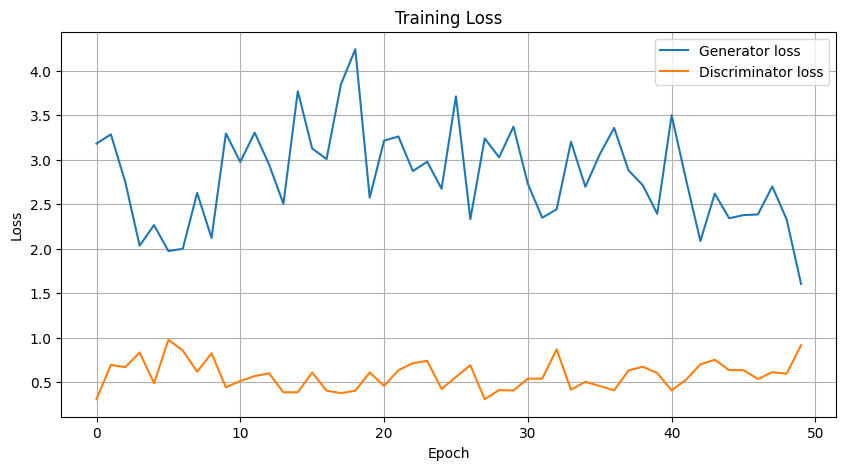

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(gen_losses,label='Generator loss')
plt.plot(disc_losses,label='Discriminator loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#to reduce the loss you can increase the number of epochs

In [ ]:
def display_generated_images():
    noise=tf.random.normal([25,100])
    generated_images=gen_model(noise,training=False)
    fig=plt.figure(figsize=(5,5))
    for i in range(generated_images.shape[0]):
        plt.subplot(5,5,i+1)
        plt.imshow(generated_images[i,:,:,0]*127.5+127.5,cmap='gray')
        plt.axis('off')
    plt.show()

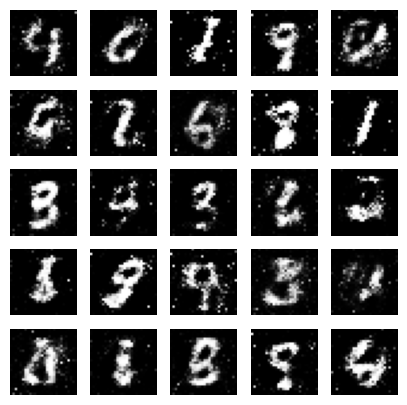

In [ ]:
display_generated_images()

In [ ]:
#imgs generated based on noisy data
#discriminator evaluates whether the img is fake or real

In [ ]:
def evaluate_disc():
    noise=tf.random.normal([100,100])
    generated_images=gen_model(noise,training=False)
    real_image=next(iter(dataset))
    real_output=disc_model(real_image,training=False)
    fake_output=disc_model(generated_images,training=False)
    real_acc=tf.reduce_mean(tf.cast(real_output>0.5,tf.float32))
    fake_acc=tf.reduce_mean(tf.cast(fake_output<0.5,tf.float32))
    #get accuracy
    print(f'Discriminator Real accuracy:{real_acc*100:.2f}%')
    print(f'Discriminator Fake accuracy:{fake_acc*100:.2f}%')
evaluate_disc()

Discriminator Real accuracy:84.38%
Discriminator Fake accuracy:80.00%


Fake image confidence (should be close to 0): 0.7022
Real image confidence (should be close to 1): 0.5328


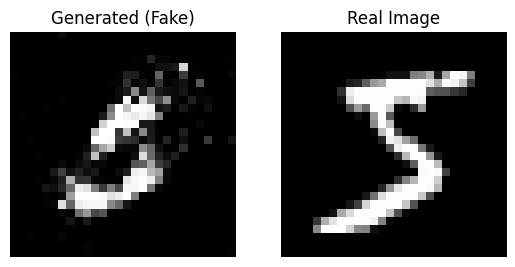

In [ ]:
# 1. Generate a fake image
noise = tf.random.normal([1, 100])  # Single noise vector
generated_image = gen_model(noise, training=False)

# 2. Pick a real image from MNIST
real_image = X_train[0]
real_image = tf.expand_dims(real_image, axis=0)  # Add batch dimension

# 3. Discriminator prediction
logit_fake = disc_model(generated_image, training=False)
logit_real = disc_model(real_image, training=False)

# 4. Apply sigmoid to get probability
prob_fake = tf.sigmoid(logit_fake)
prob_real = tf.sigmoid(logit_real)

# 5. Print and visualize
print(f"Fake image confidence (should be close to 0): {prob_fake.numpy()[0][0]:.4f}")
print(f"Real image confidence (should be close to 1): {prob_real.numpy()[0][0]:.4f}")

# Optional: Visualize both
plt.subplot(1, 2, 1)
plt.imshow(generated_image[0, :, :, 0]*0.5 + 0.5, cmap='gray')
plt.title("Generated (Fake)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_image[0, :, :, 0]*0.5 + 0.5, cmap='gray')
plt.title("Real Image")
plt.axis('off')
plt.show()